<a href="https://colab.research.google.com/github/mbkamran/ml-projects/blob/main/Classifier_Spam_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --quiet "tensorflow-text==2.8.*"

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2" 
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [5]:
path = '/content/drive/MyDrive/systems_ml/'

sentences = (pd.read_csv(path + 'training_set.csv').iloc[:,0]).to_list()
labels = (pd.read_csv(path + 'training_set.csv').iloc[:,1])
sentences = ([str(elem) for elem in sentences])
sentences

['trump tells netanyahu he would recognize jerusalem as israel capital world news',
 'southeast shootout leaves NUMBER dead NUMBER wounded saturday night in HTTP barry farm area HTTP',
 'nowplaying pipe it up clean on HTTP',
 'check out partyman318 fr good tunez',
 'love this song so much lt br keep em 39 coming',
 'good point that would sure help',
 'posted new photo to facebook HTTP',
 'rt trumpmovementus venezuela jails opposition leaders in new crackdown on opponents HTTP',
 'police search for florence robbery suspect HTTP HTTP',
 'omg there search bar in everyone following and follower list on instagram instagram have no idea what you ve just done',
 'everyone please subscribe to my channel or can you all just go look at my videos',
 'why is no one pointing out that flynns calls were intercp amp transcribed yet clapper denied the issuance of fisa warrant obamagate cnnsotu',
 'my 6th grade teacher looked exactly like katy perry come to think of it',
 'business owner entrepreneur st

In [6]:
len(sentences)

1260

In [7]:
evl_sentences = (pd.read_csv(path + 'evaluation_set.csv').iloc[:,0]).to_list()
evl_labels = (pd.read_csv(path + 'evaluation_set.csv').iloc[:,1])
evl_sentences = ([str(elem) for elem in evl_sentences])

In [8]:
test_sentences = (pd.read_csv(path + 'testing_set.csv').iloc[:,0]).to_list()
test_labels = (pd.read_csv(path + 'testing_set.csv').iloc[:,1])
test_sentences = ([str(elem) for elem in test_sentences])

In [9]:
preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)

In [10]:
inputs = preprocess(sentences)
outputs = bert(inputs)

In [11]:
evl_inputs = preprocess(evl_sentences)
evl_outputs = bert(evl_inputs)

In [12]:
test_inputs = preprocess(test_sentences)
test_outputs = bert(test_inputs)

In [13]:
outputs.keys()

dict_keys(['default', 'pooled_output', 'sequence_output', 'encoder_outputs'])

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [15]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [16]:
model = Sequential([
    Dense(units=100, activation='sigmoid'),
    Dense(units=100, activation='sigmoid'),
    Dense(units=100, activation='sigmoid'),
    Dense(units=100, activation='sigmoid'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy(), metrics=METRICS)

model.fit(outputs['pooled_output'], labels, epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 5ms/step - loss: 0.6962 - accuracy: 0.5437 - precision: 0.5364 - recall: 0.3653
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6413 - precision: 0.6369 - recall: 0.5884
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.6627 - precision: 0.6718 - recall: 0.5818
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6746 - precision: 0.6732 - recall: 0.6264
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5730 - accuracy: 0.7079 - precision: 0.7019 - recall: 0.6810
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.7325 - precision: 0.7287 - recall: 0.7058
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7484 - precision: 0.7361 - recall: 0.7421
Epoch 8/200
40/40 [=============================

In [17]:
model.evaluate(evl_outputs['pooled_output'], evl_labels)

9/9 [==============================] - 0s 2ms/step - loss: 1.2246 - accuracy: 0.7111 - precision: 0.7724 - recall: 0.6552


[1.2245920896530151, 0.7111111283302307, 0.772357702255249, 0.6551724076271057]

In [18]:
model.evaluate(test_outputs['pooled_output'], test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 1.1111 - accuracy: 0.7333 - precision: 0.7619 - recall: 0.7517


[1.1110986471176147, 0.7333333492279053, 0.761904776096344, 0.7516778707504272]

In [19]:
import numpy as np

y_predicted = model.predict(test_outputs['pooled_output'])
y_predicted = y_predicted.flatten()

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

Text(33.0, 0.5, 'Truth')

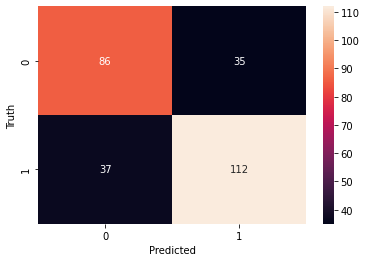

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(test_labels, y_predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')